# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [24]:
import numpy as np
import seaborn as sns
import pandas as pd

/var/folders/5w/fbj6kr3j5pq252rgncmm87w80000gn/T/ipykernel_4821/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

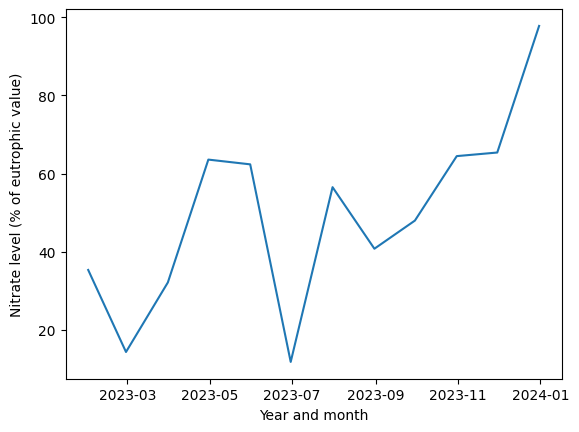

In [25]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/var/folders/5w/fbj6kr3j5pq252rgncmm87w80000gn/T/ipykernel_4821/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

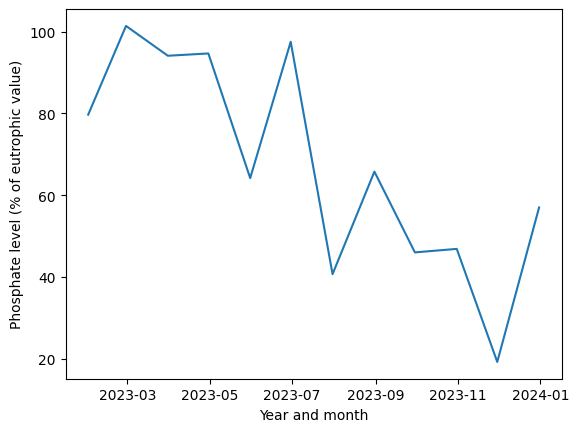

In [26]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

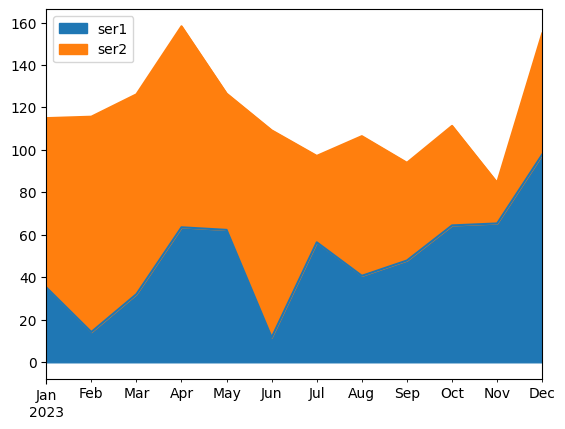

In [27]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

**Advantages of Area plot over line plot:** 

- The line plot shows variation of one element either nitrate of phosphate levels in water whereas the area plot shows the comulative chemical levels combining both nitrates and phosphates.
- The area plot makes it easier to show the contribution of nitrates and phosphates to the overall chemical composition of the water sample. 
- Area plot also sibtly shows the differences between the nitrate and phosphate levels. 

**disadvantages of Area plot:**
- Area plot does obscure the clarity of phospate levels in the water sample as this is overlapping nitrate levels over time.
- The area under the top line of area can be confusing to interpret as it includes the comulative amounts of both phosphates and nitrates. 


# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [28]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rodsaldanha/arketing-campaign")

print("Path to dataset files:", path)

Path to dataset files: /Users/sudeemangalwadekar/.cache/kagglehub/datasets/rodsaldanha/arketing-campaign/versions/8


In [29]:
df_marketing_campaign = pd.read_csv(path + "/marketing_campaign.csv", sep=';')
df_marketing_campaign.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [30]:
df_marketing_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [31]:
df_marketing_campaign.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [32]:
null_rows = df_marketing_campaign[df_marketing_campaign.isnull().any(axis=1)]
print(f"Number of rows with null values: {len(null_rows)}")
null_rows

Number of rows with null values: 24


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,6,0,0,0,0,0,0,3,11,0


In [33]:
mean_income = df_marketing_campaign['Income'].mean()
df_marketing_campaign['Income'].fillna(mean_income, inplace=True)

/var/folders/5w/fbj6kr3j5pq252rgncmm87w80000gn/T/ipykernel_4821/3624141782.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_marketing_campaign['Income'].fillna(mean_income, inplace=True)


In [34]:
null_rows = df_marketing_campaign[df_marketing_campaign.isnull().any(axis=1)]
print(f"Number of rows with null values: {len(null_rows)}")
null_rows

Number of rows with null values: 0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [35]:
duplicate_rows = df_marketing_campaign[df_marketing_campaign.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")
duplicate_rows

Number of duplicate rows: 0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [36]:
duplicate_ids = df_marketing_campaign[df_marketing_campaign['ID'].duplicated()]
print(f"Number of duplicate IDs: {len(duplicate_ids)}")
duplicate_ids

Number of duplicate IDs: 0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [37]:
mean_values = df_marketing_campaign.mean(numeric_only=True)
median_values = df_marketing_campaign.median(numeric_only=True)
mode_values = df_marketing_campaign.mode().iloc[0]

print("Mean:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nMode:\n", mode_values)

Mean:
 ID                      5592.159821
Year_Birth              1968.805804
Income                 52247.251354
Kidhome                    0.444196
Teenhome                   0.506250
Recency                   49.109375
MntWines                 303.935714
MntFruits                 26.302232
MntMeatProducts          166.950000
MntFishProducts           37.525446
MntSweetProducts          27.062946
MntGoldProds              44.021875
NumDealsPurchases          2.325000
NumWebPurchases            4.084821
NumCatalogPurchases        2.662054
NumStorePurchases          5.790179
NumWebVisitsMonth          5.316518
AcceptedCmp3               0.072768
AcceptedCmp4               0.074554
AcceptedCmp5               0.072768
AcceptedCmp1               0.064286
AcceptedCmp2               0.013393
Complain                   0.009375
Z_CostContact              3.000000
Z_Revenue                 11.000000
Response                   0.149107
dtype: float64

Median:
 ID                      5458.5
Y

In [38]:
df_marketing_campaign.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

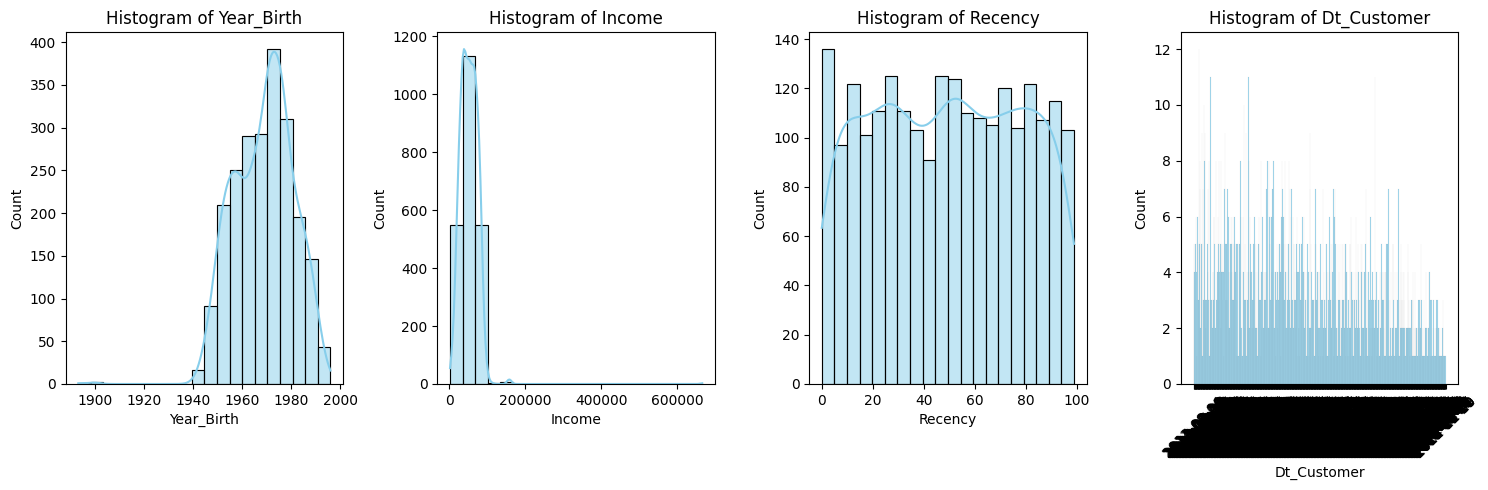

In [39]:
import seaborn as sns

import matplotlib.pyplot as plt

# Draw histograms for specified columns in the dataframe
columns_to_plot = ['Year_Birth', 'Income', 'Recency']
fig, axes = plt.subplots(1, 4, figsize=(15, 5), tight_layout=True)
for i, column in enumerate(columns_to_plot):
    sns.histplot(data=df_marketing_campaign, x=column, bins=20, kde=True, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')

# Convert Dt_Customer to datetime and plot its histogram
sns.histplot(data=df_marketing_campaign, x='Dt_Customer', bins=20, kde=False, color='skyblue', edgecolor='black')
plt.title('Histogram of Dt_Customer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

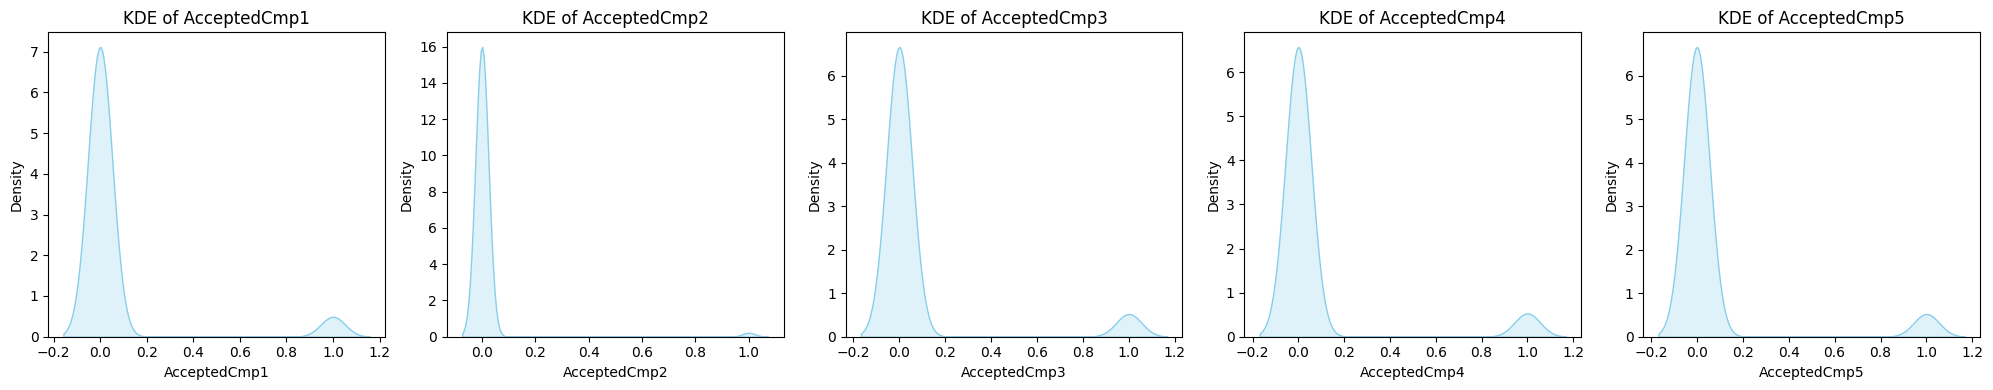

In [40]:
#  draw kde plots for  columns AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4 and AcceptedCmp5 in the dataframe df_marketing_campaign
kde_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
fig, axes = plt.subplots(1, 5, figsize=(20, 4), tight_layout=True)
for i, column in enumerate(kde_columns):
    sns.kdeplot(data=df_marketing_campaign, x=column, ax=axes[i], fill=True, color='skyblue')
    axes[i].set_title(f'KDE of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')
plt.show()  


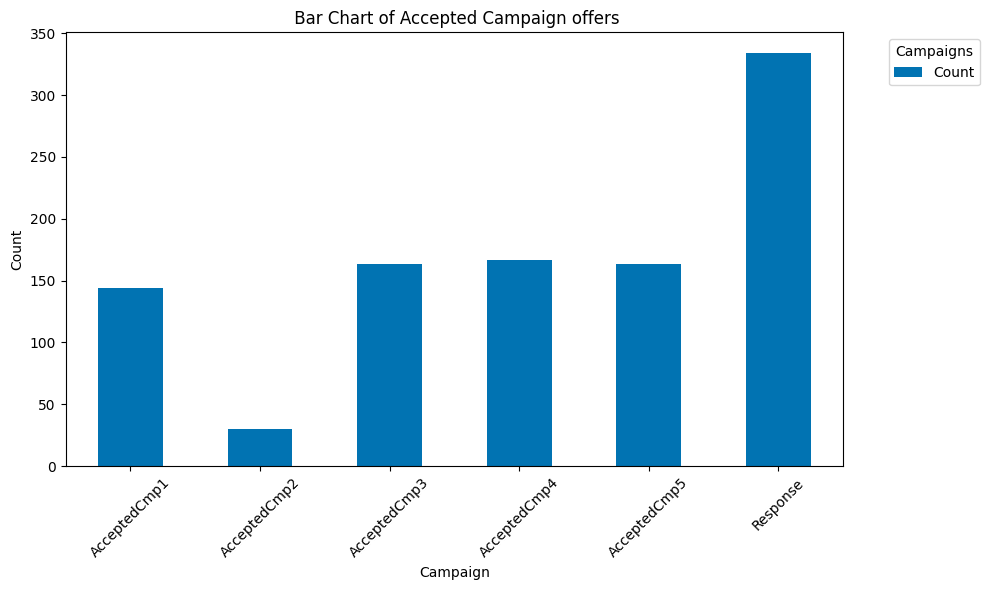

In [41]:
#draw stacked bar chart for sum of columns ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'] split by each column in different colors
accepted_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df_accepted = df_marketing_campaign[accepted_columns].sum().reset_index()
df_accepted.columns = ['Campaign', 'Count']
df_accepted.set_index('Campaign', inplace=True)
df_accepted.plot(kind='bar', stacked=True, color=sns.color_palette("colorblind6"), figsize=(10, 6))
plt.title(' Bar Chart of Accepted Campaign offers')
plt.xlabel('Campaign')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Campaigns', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

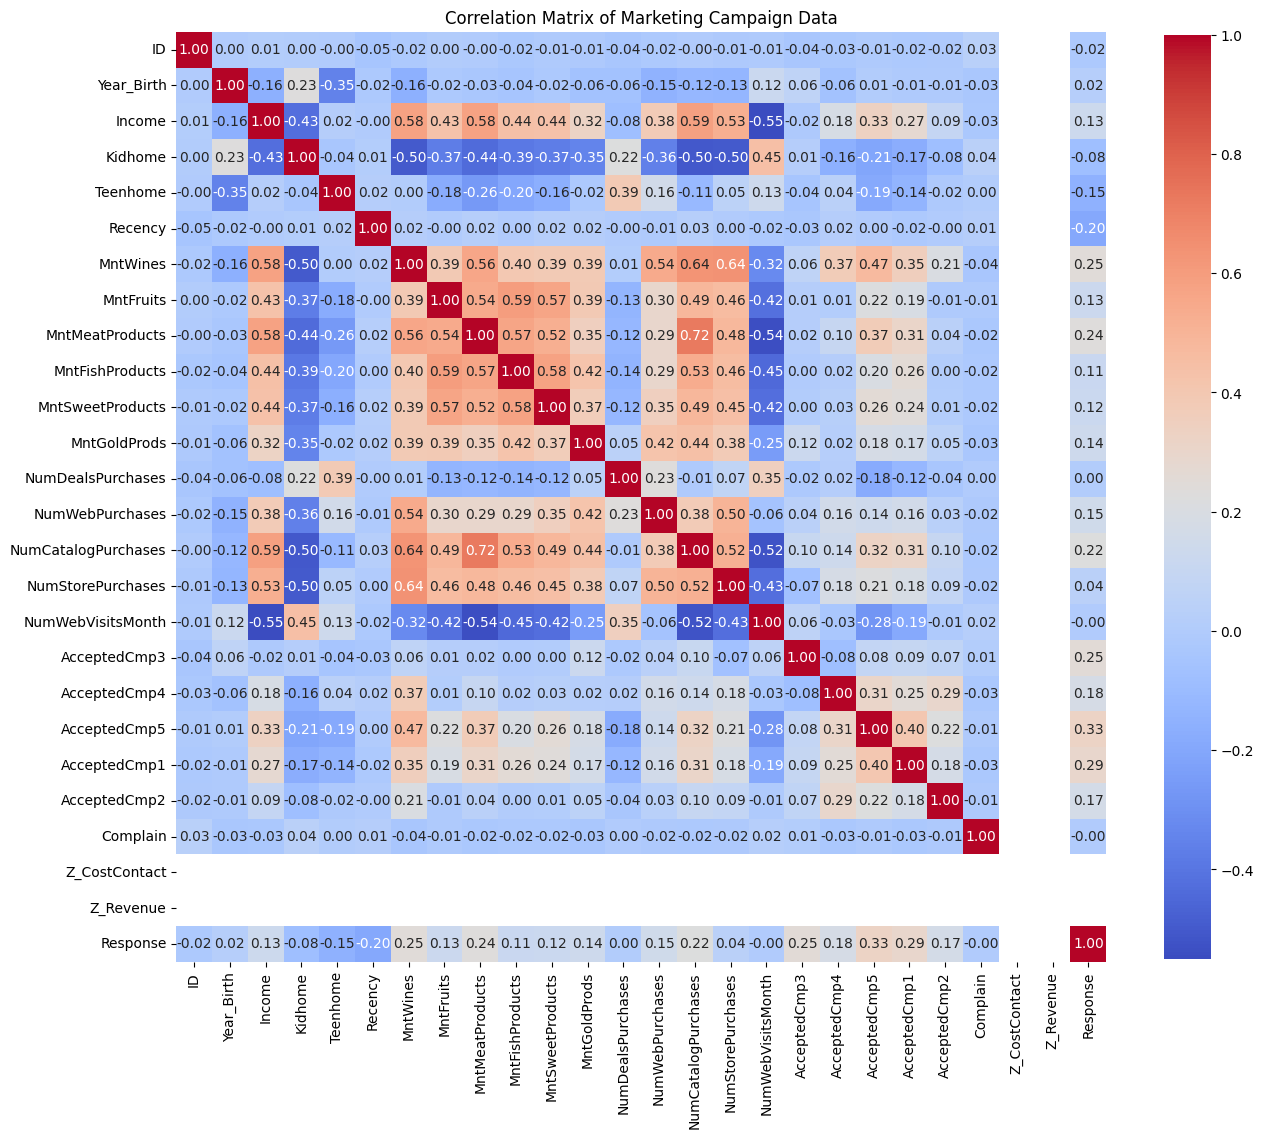

In [42]:
# plot a correlation matrix for the numeric columns in the dataframe df_marketing_campaign

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 15))
correlation_matrix = df_marketing_campaign.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Marketing Campaign Data')
plt.show()

In [43]:
# print the pairs of columns with a correlation coefficient greater than 0.75
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.55:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))
print("Pairs of columns with correlation coefficient greater than 0.75:")
for col1, col2, corr in high_correlation_pairs:
    print(f"{col1} and {col2}: {corr:.2f}")

Pairs of columns with correlation coefficient greater than 0.75:
MntWines and Income: 0.58
MntMeatProducts and Income: 0.58
MntMeatProducts and MntWines: 0.56
MntFishProducts and MntFruits: 0.59
MntFishProducts and MntMeatProducts: 0.57
MntSweetProducts and MntFruits: 0.57
MntSweetProducts and MntFishProducts: 0.58
NumCatalogPurchases and Income: 0.59
NumCatalogPurchases and MntWines: 0.64
NumCatalogPurchases and MntMeatProducts: 0.72
NumStorePurchases and MntWines: 0.64


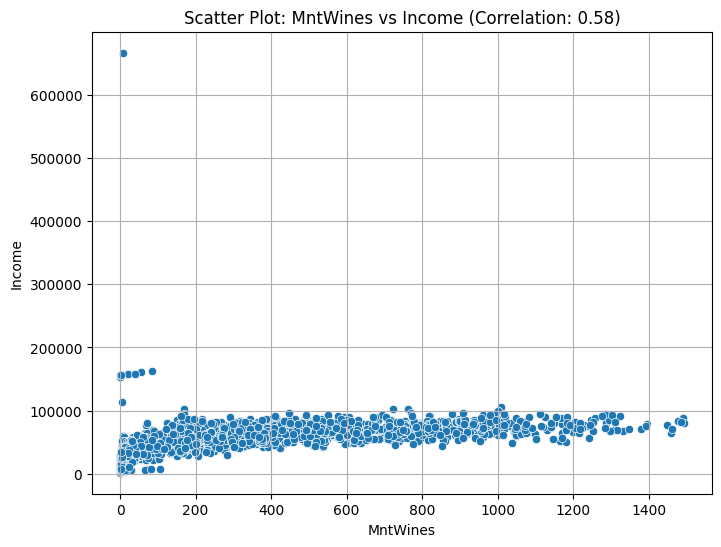

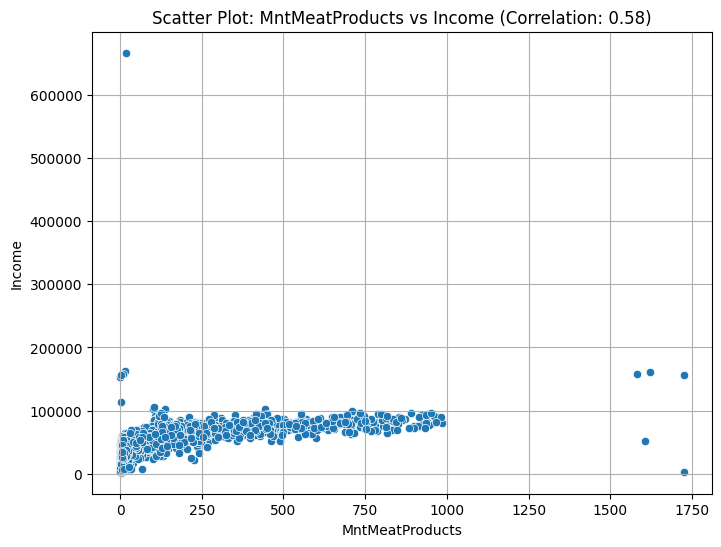

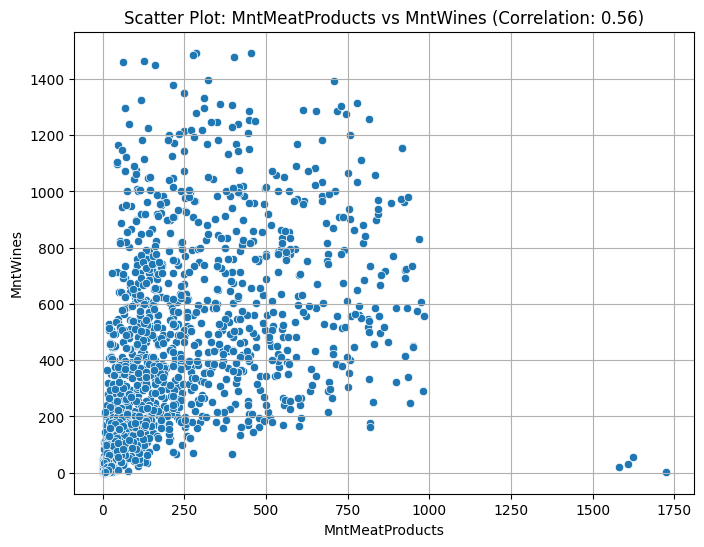

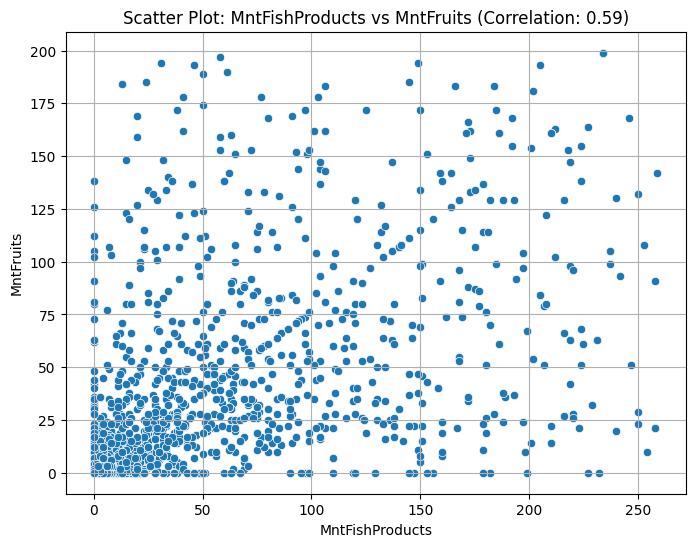

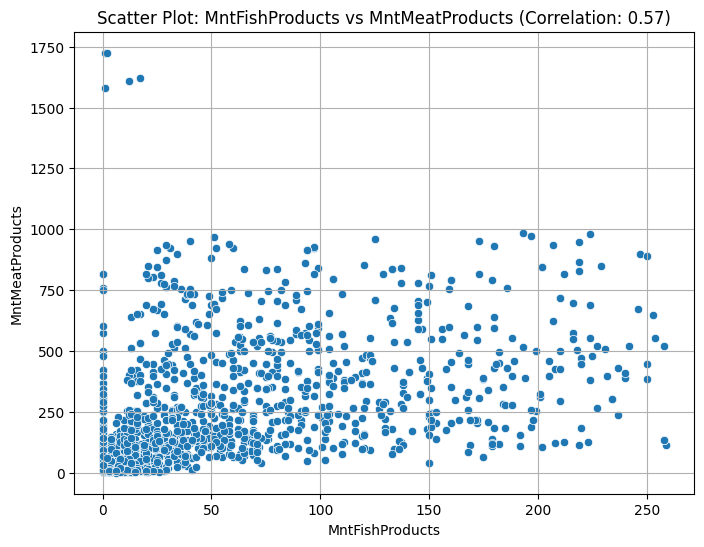

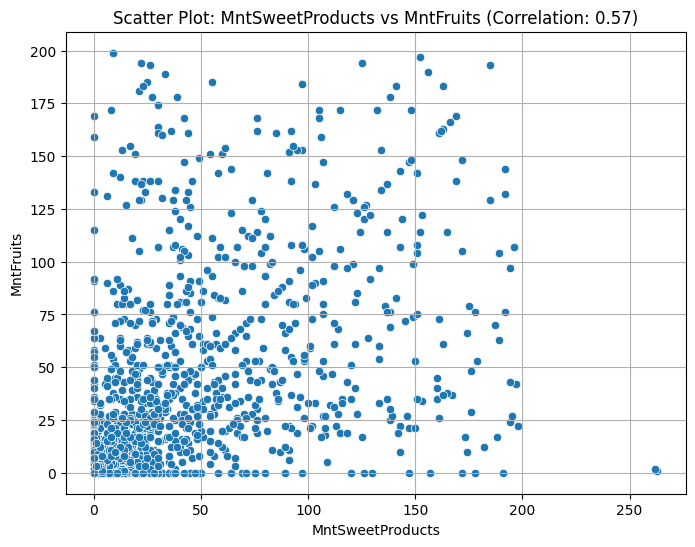

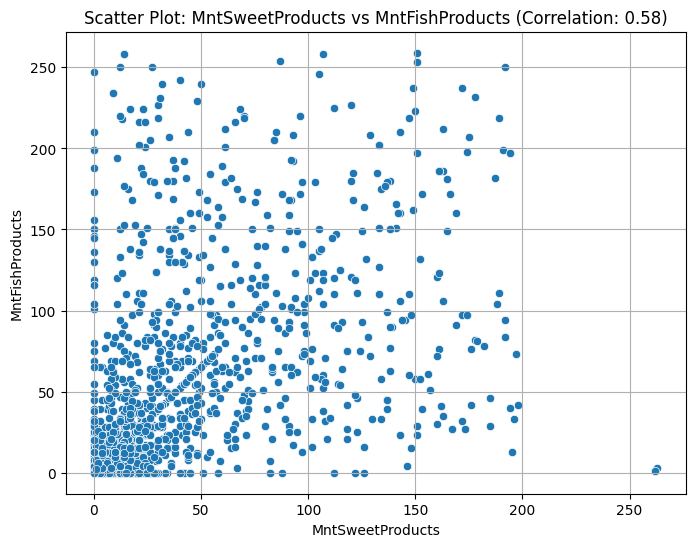

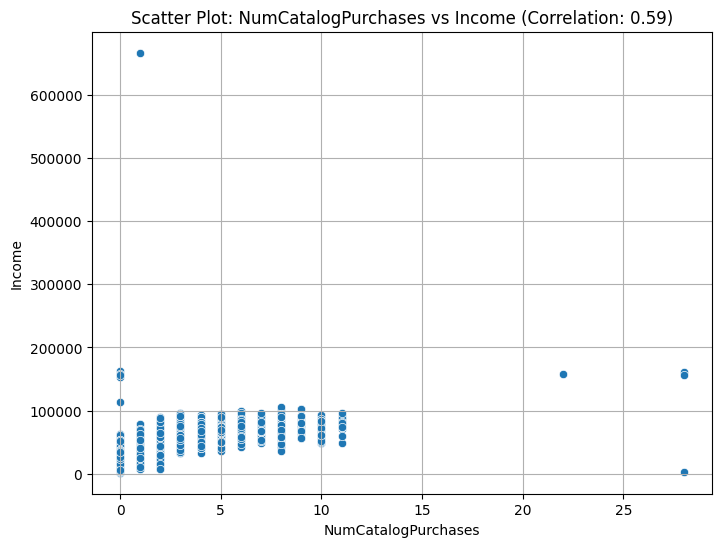

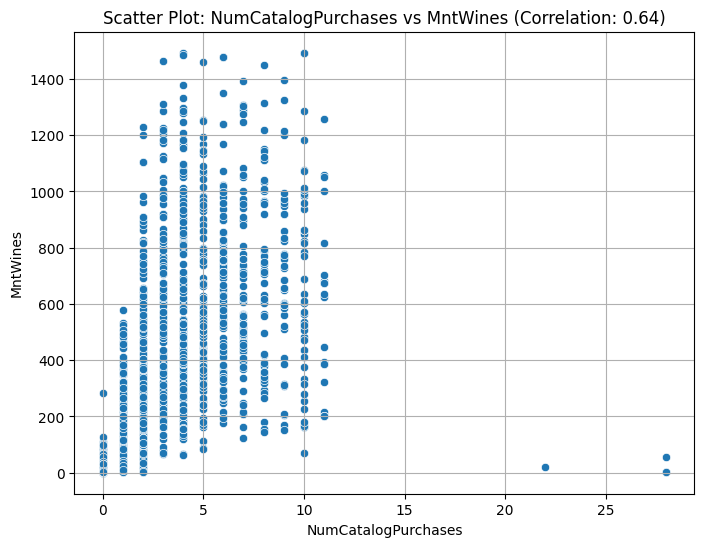

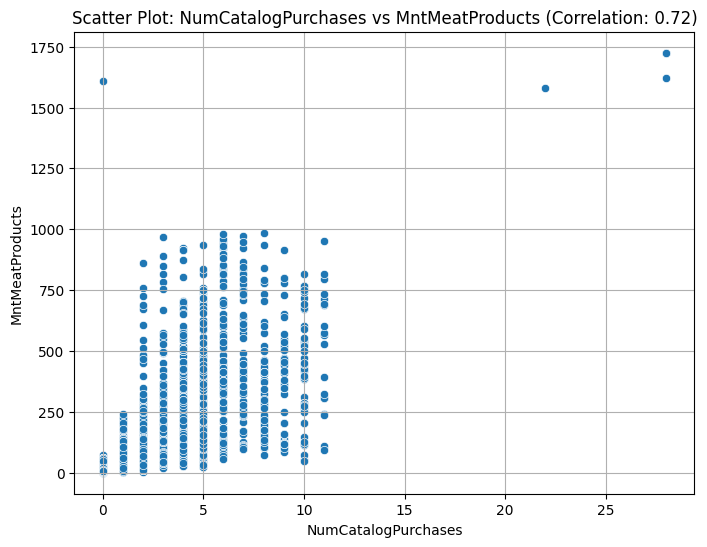

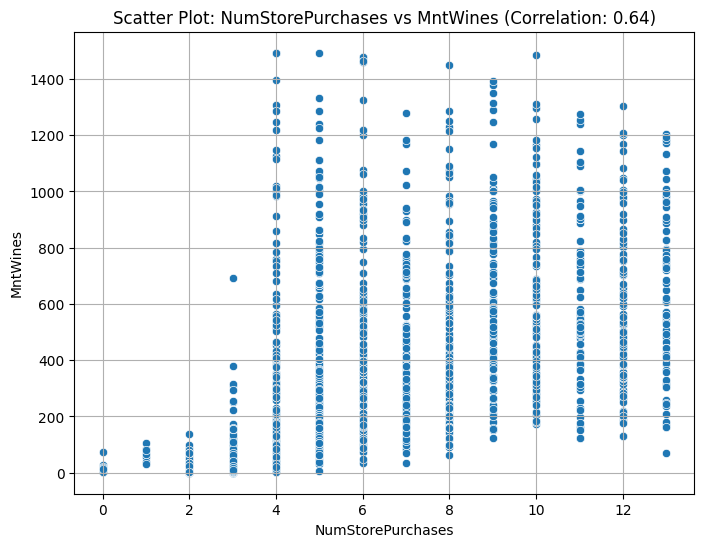

In [44]:
#draw a scatter plot for the pairs of columns with a correlation coefficient greater than 0.55
for col1, col2, corr in high_correlation_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_marketing_campaign, x=col1, y=col2)
    plt.title(f'Scatter Plot: {col1} vs {col2} (Correlation: {corr:.2f})')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.grid(True)
    plt.show()

['MntFishProducts', 'NumStorePurchases', 'NumCatalogPurchases', 'MntSweetProducts', 'MntWines', 'Income', 'MntFruits', 'MntMeatProducts', 'Response']


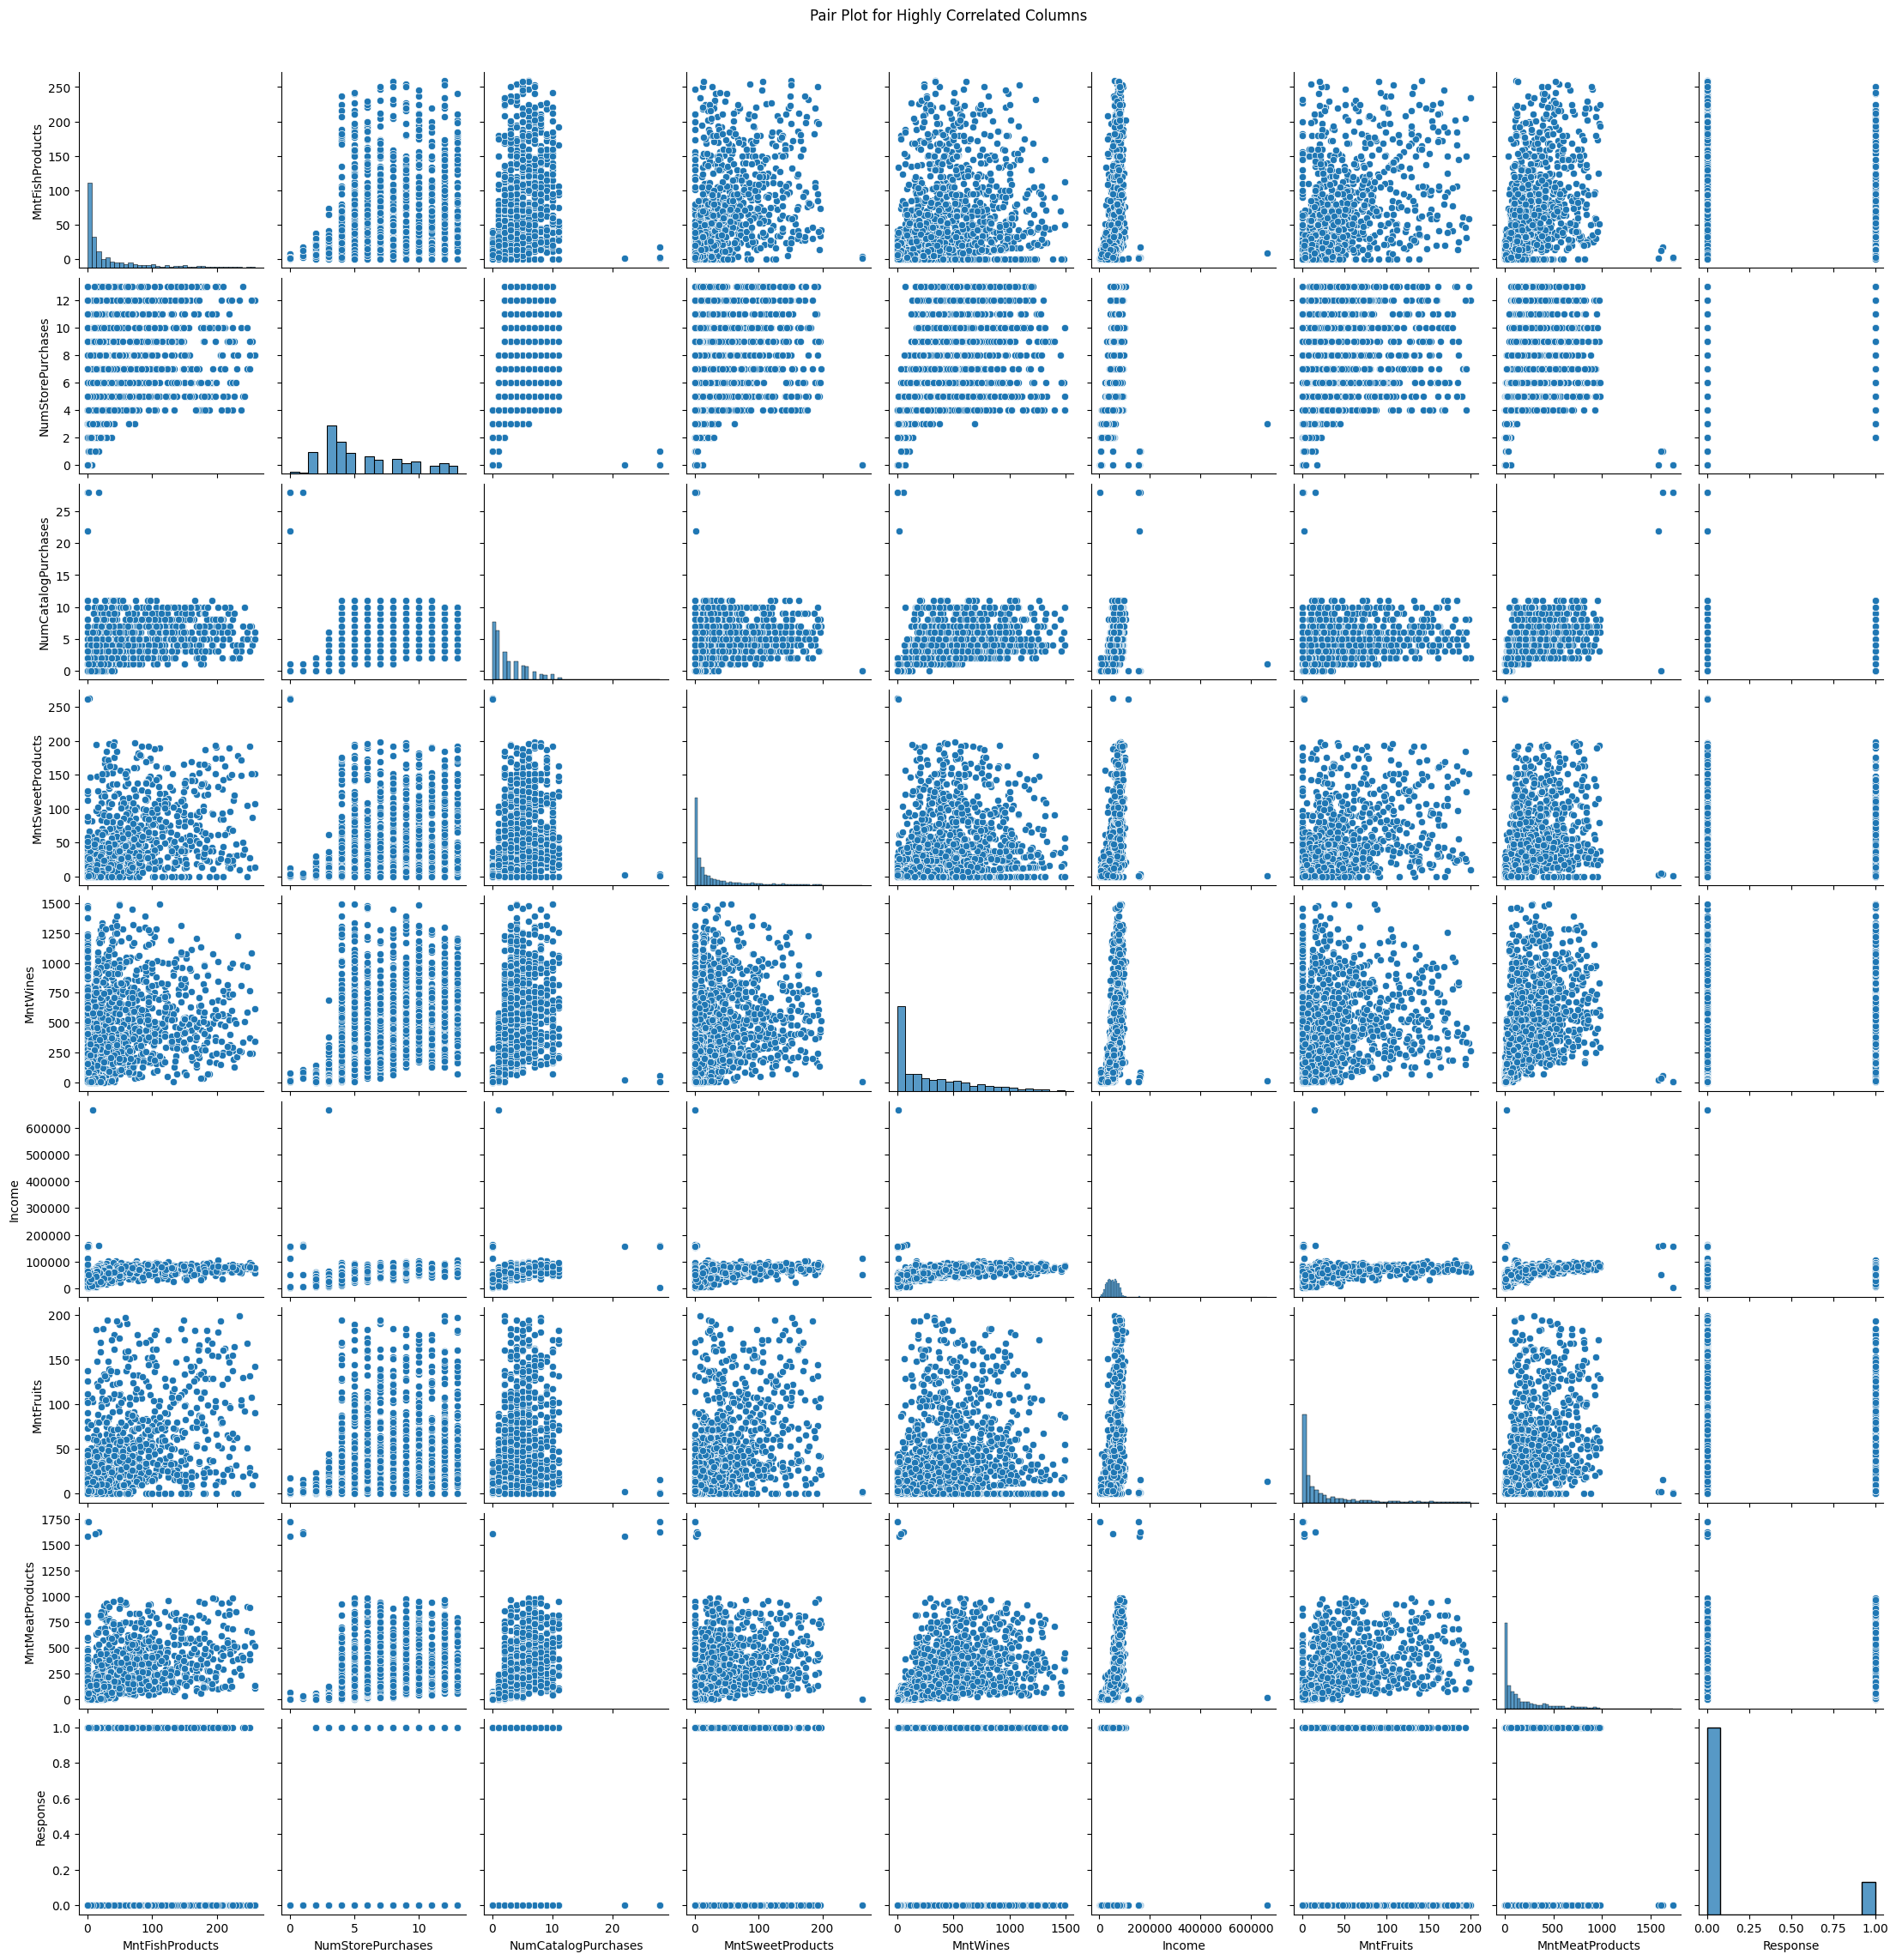

In [45]:
col1_list = [col1 for col1, col2, corr in high_correlation_pairs]
col2_list = [col2 for col1, col2, corr in high_correlation_pairs]
unique_columns = list(set(col1_list + col2_list))
unique_columns.append('Response')
print(unique_columns)
sns.pairplot(df_marketing_campaign, vars=unique_columns)
plt.suptitle('Pair Plot for Highly Correlated Columns', y=1.02)
plt.show()

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data! <br>


The marketing campaign dataset presents with customer records with details about customer attributes and how they responded to a marketing campaign. The dataset has 2240 rows with only 24 rows with Null values in the Income column . once the Nulls in income column are imputed with mean values in the income column this dataset can be used for modelling.

- Do you see any outliers?  (Data points that are far from the rest of the data).<br>

There is a record in the dataset with customer id = 0 and another record with Income = 1730. These are possibly erroneous information.

- Are any data items highly correlated with each other, suggesting that they are redundant?<br>

The amount spend on different types of products like amount spent on meat , fish , sweet products are correlated between each other.

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?<br>

Since this dataset is about unique customers and their spend and marketing campaign response rate there is no trend information available over time . 

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)<br>

There are no confounding variables reported in the marketing campaign dataset.



# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

/var/folders/5w/fbj6kr3j5pq252rgncmm87w80000gn/T/ipykernel_4821/2956747814.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  new_datearray = pd.date_range(start='2024-01-01', end='2025-12-31', freq='M')


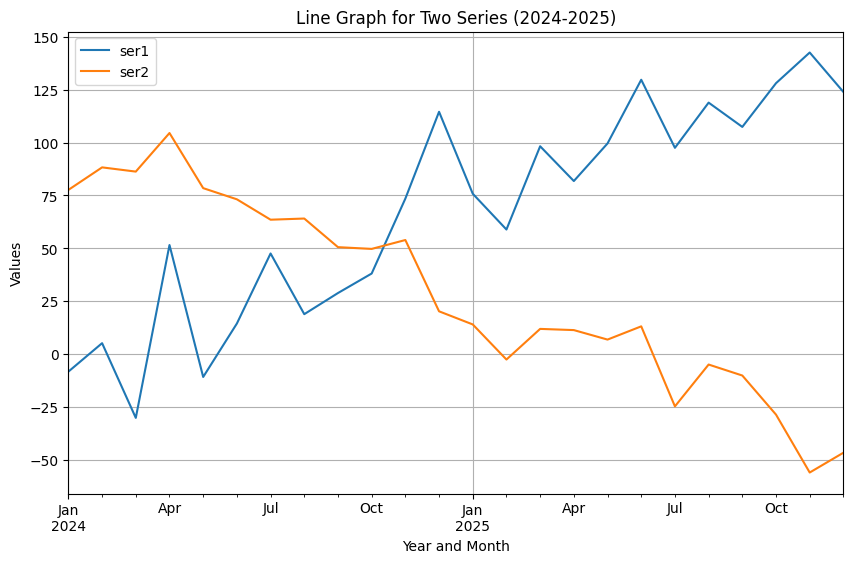

In [46]:
new_datearray = pd.date_range(start='2024-01-01', end='2025-12-31', freq='M')

np.random.seed(2)
new_time_series_1 = 100 * (np.random.normal(size=len(new_datearray)) / 5 + np.arange(len(new_datearray)) / 16)
np.random.seed(3)
new_time_series_2 = 100 * (1 - (np.random.normal(size=len(new_datearray)) / 8 + np.arange(len(new_datearray)) / 16))

new_df = pd.DataFrame({'ser1': new_time_series_1, 'ser2': new_time_series_2}, index=new_datearray)

ax = new_df.plot.line(figsize=(10, 6))
ax.set_xlabel("Year and Month")
ax.set_ylabel("Values")
ax.set_title("Line Graph for Two Series (2024-2025)")
plt.grid(True)
plt.show()